# Bivariate Exploration of Data
## Screencast Scripts

(Make sure that you've downloaded `fuel_econ.csv` to be able to run the cells
in this notebook!)

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


> In this lesson, we will be exploring bivariate visualizations
through the use of this dataset on fuel efficiency. The data consists
of over 3900 sedans with manufacturing years from 2013 to 2018, and
only considers conventional fuels.

## 4.2 Scatterplots and Correlation

### Main Points

1. How to create a scatterplot.

> Let's start by looking at the relationship between two quantitative
variables: the engine displacement in liters and the overall fuel
mileage in MPG. Is a larger engine associated with a higher fuel
efficiency, or a lower one? We can investigate this relationship using
a scatter plot.
> 
> One way of creating a scatterplot is through matplotlib's `scatter`
function. The arguments to this function are similar to what we've
used before, but now we specify variables on both the x and y axes.
Set the data parameter to `fuel_econ`, x to `displ`, and y to `comb`.
I've also added labels using `xlabel` and `ylabel` to help keep track of
the variables plotted on each axis.

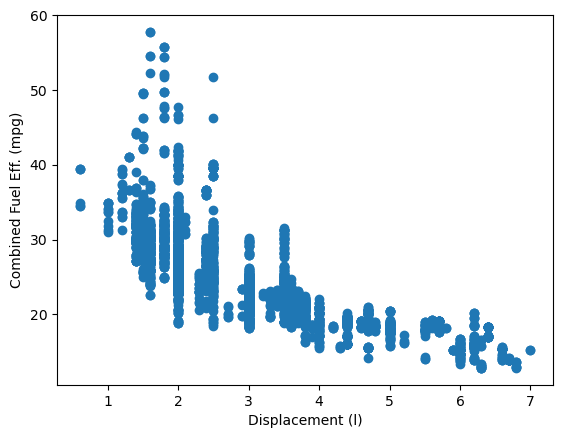

In [3]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

> The plot suggests a generally negative correlation between
engine size and fuel efficiency. There's a large amount of
variability for the smaller displacements compared to the
larger ones.
>
> An alternative way of creating a scatter plot is through
seaborn's `regplot` function. This function combines the
creation of a scatterplot with the fitting of a regression line
to the data. To use it, just use the function `sb.regplot` instead
of `plt.scatter()`.

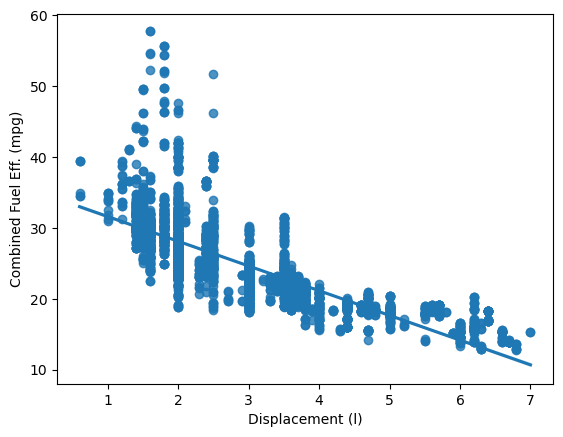

In [4]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

> Looking at the line, you can see how the cars with lower displacements
and higher efficiency bring up the left side of the line. You can
turn off the regression line if you'd like, by setting `fit_reg = False`.

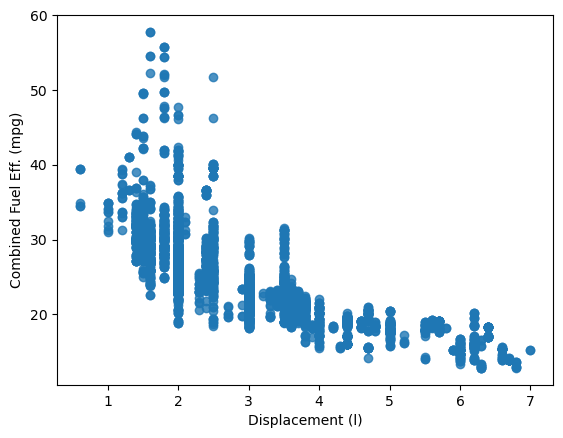

In [5]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', fit_reg = False);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

> You might have some questions about the data just looking at this
plot. The displacements are only listed to an accuracy of .1 liter,
and since there's a lot of data to be plotted, there might be a lot
of overlap in points such that we don't really see the true relationship
between variables in enough detail. We'll get to techniques that address
this concern in the upcoming videos.

## 4.3 Overplotting, Transparency, and Jitter

### Main Points

1. Use transparency to alleviate overplotting for having too much continuous numeric data.
2. Use jitter to improve readability for discrete numeric data.

> Let's take a look at the relationship of fuel efficiency against
another variable: manufacturing year. With improvements in technology
and increasing environmental concerns, have cars running under
conventional fuels seen recent increases in fuel efficiency? Let's
start by looking at a scatter plot of combined fuel efficiency
against year like we tried last time.

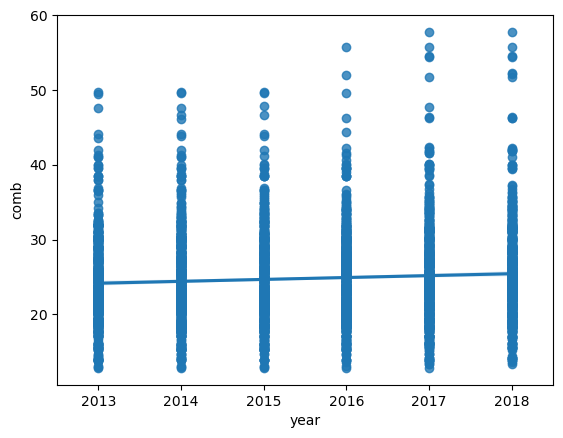

In [6]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb');
plt.xlim((2012.5, 2018.5));

> The fit regression line suggests a slight upward trend in efficiency,
but this is not clear from the data. The only points that we can
really make out are those above about 42 mpg. This is a clear place
for us to make use of transparency and jitter settings.
>
> Let's start with jitter. Since we want to jitter the x-values, we add
the "x_jitter" parameter. The value, 0.3, means that each x-value will
be adjusted randomly, up to 0.3 more or 0.3 less. It should be noted
that this only works with seaborn's `regplot` function, and not in
matplotlib's `scatter`.

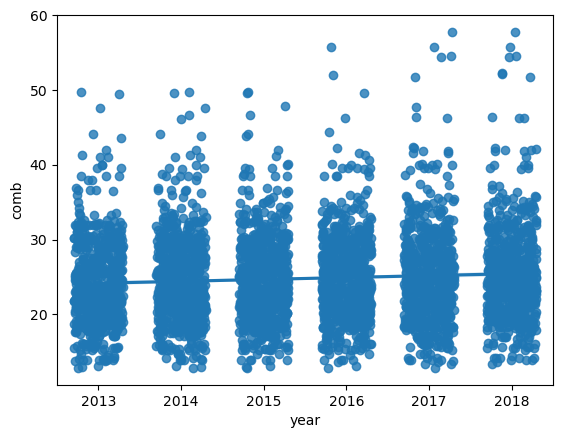

In [7]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3);
plt.xlim((2012.5, 2018.5));

> The points now get arranged in strips with some width, rather
than a single line. But this is still not enough to really see the
distribution of points below the mid-30s. We should now add some
transparency.
>
> If we were working with matplotlib's `scatter` function, we could
just add a parameter "alpha" directly to the function call. With
`regplot`, we need to instead set the parameter in a dictionary set
to the `scatter_kws` parameter.
>
> Alpha takes a value between 0 and 1 that specifies the opaqueness
of points. 0 is fully transparent and 1 is fully opaque. Let's start
by trying an alpha of one fifth.

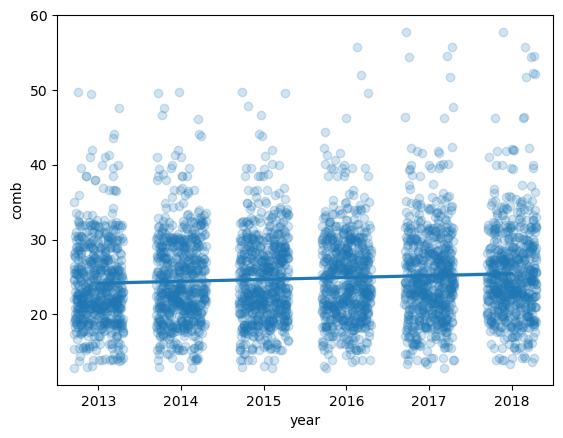

In [8]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3,
           scatter_kws = {'alpha' : 1/5});
plt.xlim((2012.5, 2018.5));

> It's a good start, but the interesting areas in the center
are still pretty indistinguishable. What if we try an alpha of
one twentieth?

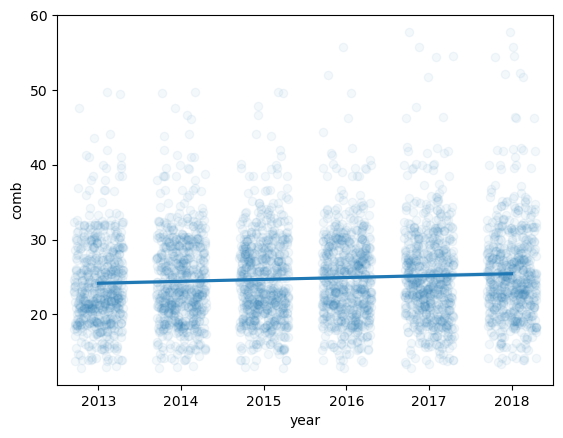

In [9]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3,
           scatter_kws = {'alpha' : 1/20});
plt.xlim((2012.5, 2018.5));

> We can see the trend in the points a bit better now. Darker areas
naturally come about as an outcome of transparent points overlapping,
and these areas slightly rise in value across years. Note that, through
all of this, the regression line hasn't changed. The jittering and
transparency don't affect the underlying values for the purposes of
regression line fits.
>
> If you're still feeling unsatisfied with the result of all this,
there's still more alternative ways of plotting the data. For example,
since year is discrete, we might treat it as a categorical variable,
and use a different plot type you'll see later.

## 4.4 Heat Maps

### Main Points

1. Plot numeric data using a heat map.
2. Show the impact of bin size on heat map readability.

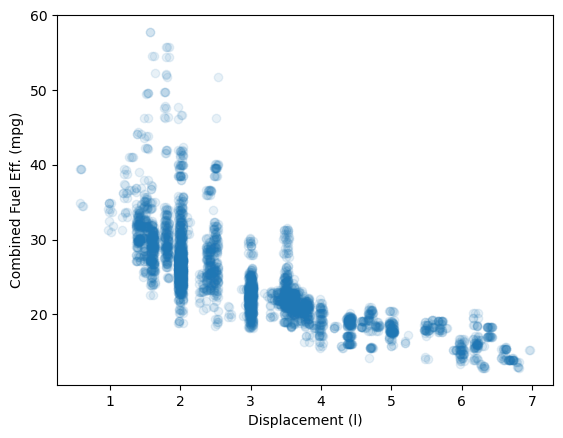

In [10]:
# previous scatter plot, with jitter and transparency
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter = 0.04,
           scatter_kws = {'alpha' : 1/10}, fit_reg = False);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

> Earlier, we looked at the relationship between engine size and
fuel efficiency using a scatterplot. I've added some jitter and
transparency to see where the main bulk of the data lies.
>
> We can also plot this data as a heat map, or a 2-d histogram.
The simplest way of going about this is by using matplotlib's
`hist2d` function. I'm also adding a `colorbar` function call
so that a legend associating the counts is placed adjacent to the plot.

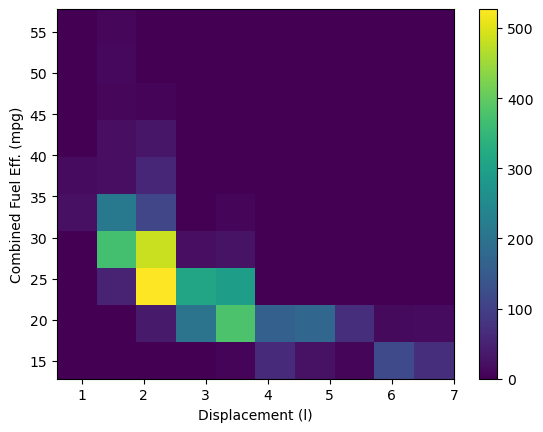

In [11]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.colorbar();

> Similar to the univariate `hist` function, by default each
dimension is split into ten bins, and the number of points in
each rectangular bin is counted up. Each count is associated
with a color; in this default matplotlib color palette, called
'viridis', higher counts skew yellow and bright, lower counts
darker and purple.
>
> We can still see the main trend we saw before, but we can
certainly do better. First, let's set a minimum bound of counts
before a rectangular area can be plotted. By setting `cmin` to
a value, such as 0.5, any bin with no counts will return as NaN
and not get colored in.

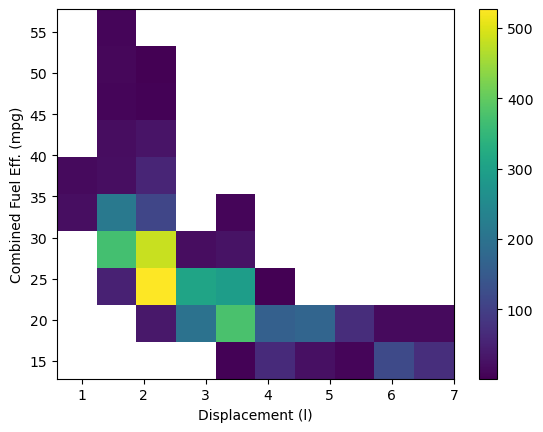

In [12]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.colorbar();

> Since white now represents zero, I should choose a reversed
color palette where darker colors are associated with higher values.
I'll set the "cmap" variable to 'viridis_r', with the '\_r' indicating
a reversed colormap.

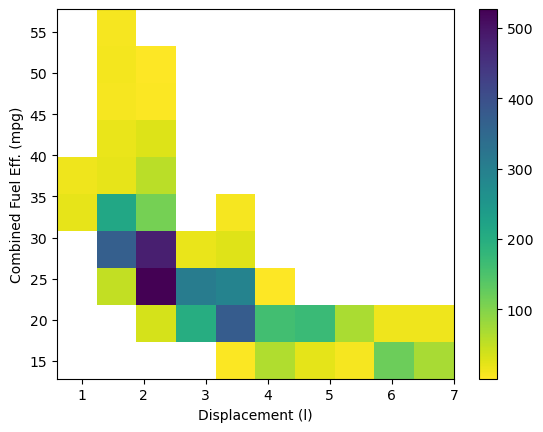

In [13]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
           cmap = 'viridis_r');
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.colorbar();

> There's a ton of built-in color maps compatible
with matplotlib that can be found in the documentation. I'll defer
a deeper discussion of color in general until later in the course.
>
> Finally, let's change the bins. We can provide `hist2d`'s "bins"
parameter with a list of two lists, specifying the bin edges for
the x- and y- axes, in that order. After looking at the descriptive
statistics for my two variables...

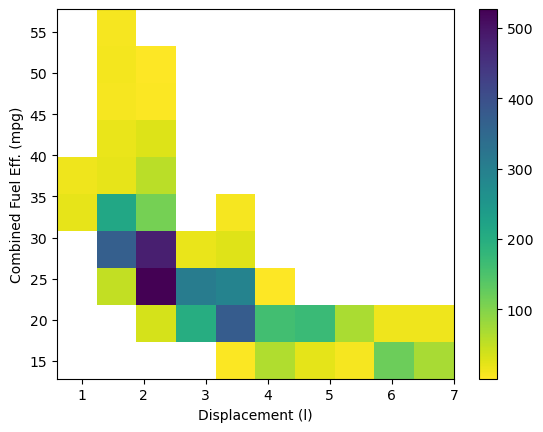

In [52]:
# just running this cell will throw an error since bins_x and bins_y
# haven't been specified yet!
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
           cmap = 'viridis_r');  # , bins = [bins_x, bins_y]
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.colorbar();


In [17]:
fuel_econ[['displ','comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


> I've decided to go with bin sizes of 0.3 and 3. I'll use
numpy's `arange` function to assign the bin edges to my `bins_x`
and `bins_y` variables, and then generate the revised plot.

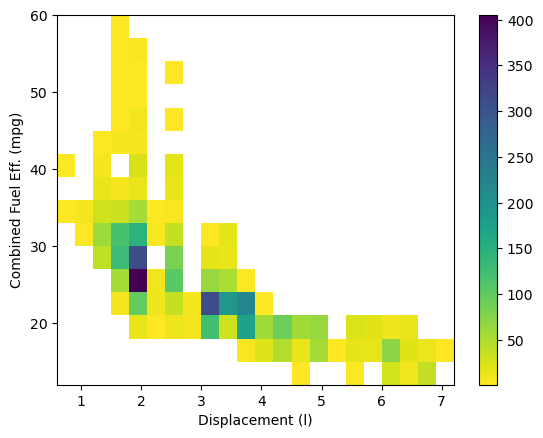

In [18]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
           cmap = 'viridis_r', bins = [bins_x, bins_y]);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.colorbar();

> We can see the plot two areas of high frequency in the middle of
the negative trend between fuel efficiency and engine size.

## 4.6 Violin Plots

### Main Points

1. How to create violin plots.
2. Use seaborn settings to change how plots are generated.

> Thus far in the lesson, we've only looked at relationships between
quantitative variables. We'll now look at the relationship between our
fuel efficiency variable against a qualitative variable, vehicle class.
Note here that I've used pandas' `astype` function to convert the
`VClass` column from a plain object type into an ordered categorical
type, putting the classes in order of size. This way, the sorting of
levels is automatic and I won't need to set an "order" parameter in my
visualization calls.

In [19]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

> The plot type I'll be going over in this video is the violin plot.
When we use seaborn's `violinplot` function in the usual way, setting
the data, x, and y variables, we get the following plot out:

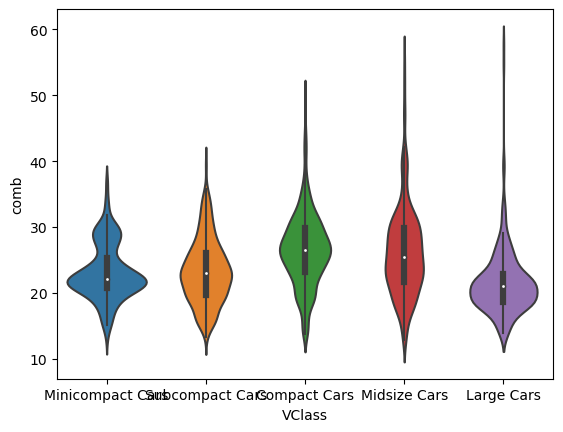

In [20]:
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb');

> I'm going to use `color_palette` to make each level the same color
and the `xticks` function to slightly rotate the labels. For now, I'm
also going to set the `inner = None` parameter to clean the middle of
the plots up. I'll get back to this parameter later.

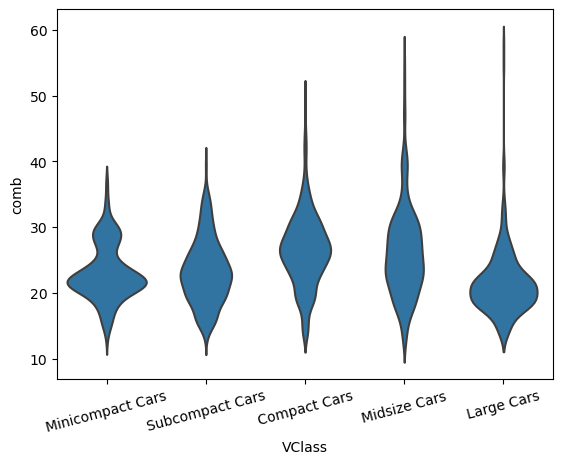

In [21]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color, inner = None);
plt.xticks(rotation = 15);

> For each of the vehicle classes, an area is plotted that shows
the approximate density of efficiency values for each vehicle class.
They're like density curves turned on their sides.
> 
> From this plot, we can see that there isn't a monotonic relationship
between car size and fuel efficiency. The largest cars seem to have the
lowest fuel efficiencies, but the long tail suggests outliers with the
highest of efficiencies. Minicompact and subcompact cars have the next-
best efficiencies, but the distribution for minicompact cars is more peaked.
Finally, compact and midsize cars have the best efficiencies, but the
distribution of the midsize cars is broader than the compacts.
>
> Let's briefly go back to the plot without the `inner = None` parameter setting.

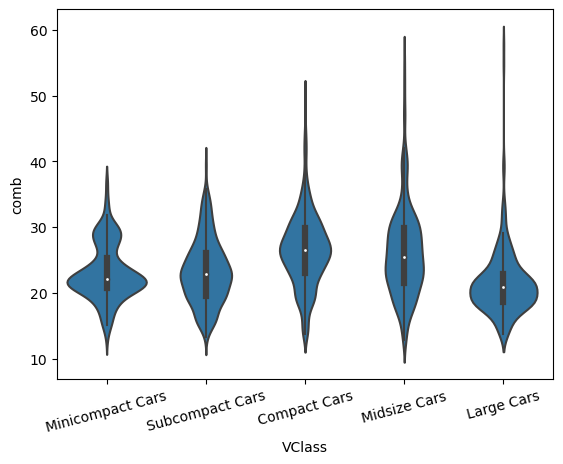

In [22]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color);
plt.xticks(rotation = 15);

> The thing that is plotted in each 'violin' is a miniature box plot.
A box plot is another quantitative vs. qualitative plot type that
takes a summary approach to displaying the data. More detail about
that in the next video.

## 4.7 Box Plots

### Main Points

1. How to create box plots.

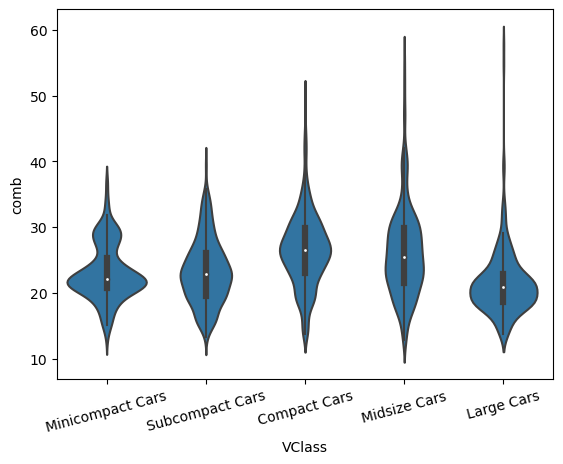

In [23]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color);
plt.xticks(rotation = 15);

> Last time, we used a violin plot to look at the relationship
between vehicle class and fuel efficiency. Now, we'll use box
plots to summarize that relationship. Just substitute `violinplot`
for `boxplot` and we've got our output.

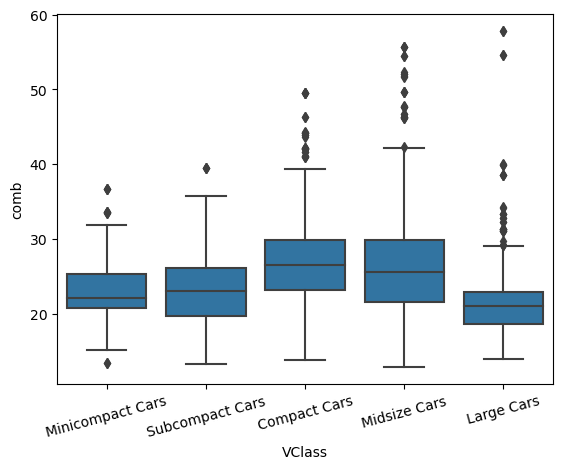

In [24]:
base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color);
plt.xticks(rotation = 15);

> The bottom of each box indicates the first quartile, the top of
each box the third quartile, and the central line the median. Whiskers
branch out towards the min and max in each group, with outliers depicted
as individual points past a maximum whisker length that depends on each
group's box height. The box plot supports the observations we made in
the last video regarding the relative order and variability in fuel
efficiencies by vehicle class.
>
> Moving back to the violin plot, now you can understand what was plotted
in each 'violin' area.

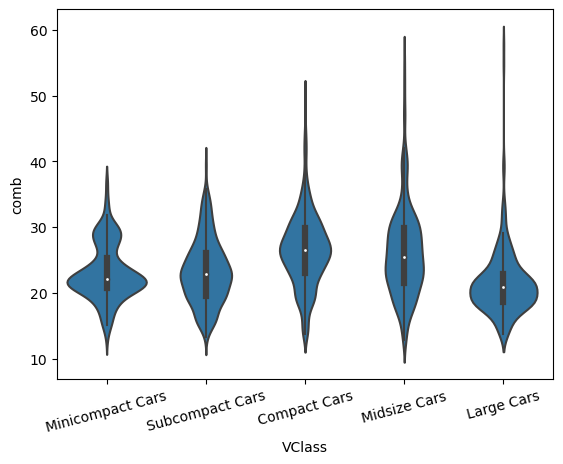

In [25]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color);
plt.xticks(rotation = 15);

> The thicker black region represents the interquartile range,
with the white dot the median. I actually prefer the `inner = 'quartile'`
parameter setting, which only plots the quartiles as dashed lines.

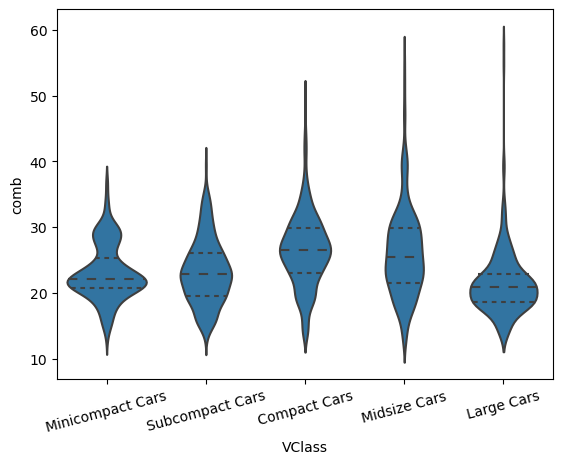

In [26]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color, inner = 'quartile');
plt.xticks(rotation = 15);

> The line with larger dashes is the median, with the lines with
shorter dashes on either side the quartiles.

## 4.9 Clustered Bar Charts

### Main Points

1. How to plot clustered bar charts.

In [27]:
# new column with car transmission type parsed from an existing column
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

> Let's plot the relationship between two qualitative variables:
vehicle class and type of vehicle transmission. To simplify things,
I'm only going to look at the main type division, automatic
or manual, which has been stored in the `trans_type` column.
>
> One way of depicting this could be with a heat map like we saw
before. There's actually a seaborn function for this categorical
type of heat map, the `heatmap` function.

In [28]:
# running this cell will throw an error until ct_counts is created, below.
sb.heatmap(ct_counts);

NameError: name 'ct_counts' is not defined

>  However, this function takes as an argument a 2-d array or
dataframe with the values to be depicted. That means that we need
to do some summarization work ourselves before we can create our plot.
> 
> First, I use the `groupby` and `size` functions to get the number
of cars in each combination of the two variables' levels as a pandas
Series. Then, I use `reset_index` to convert the Series into a DataFrame.
Finally, I use pivot to rearrange the data so that I have vehicle class
on rows, transmission types on columns, and values in the cells. Now we're
ready to plot.

In [30]:
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')

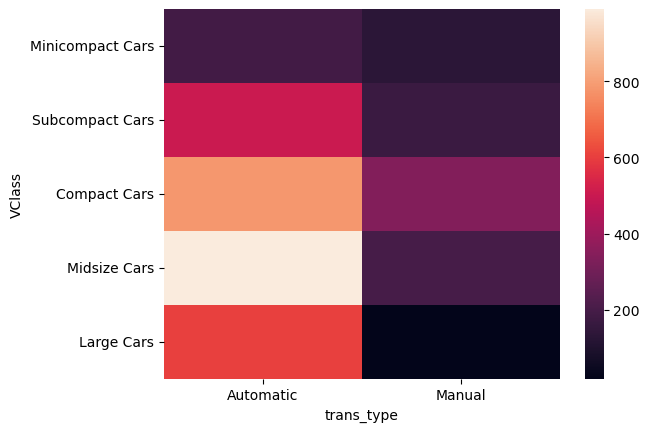

In [31]:
sb.heatmap(ct_counts);

> This is kind of disappointing. It's actually pretty hard to compare
the counts and transmission ratios from the colors alone. We can
add annotations with counts to the cells, which makes the representation
more tabular in nature.

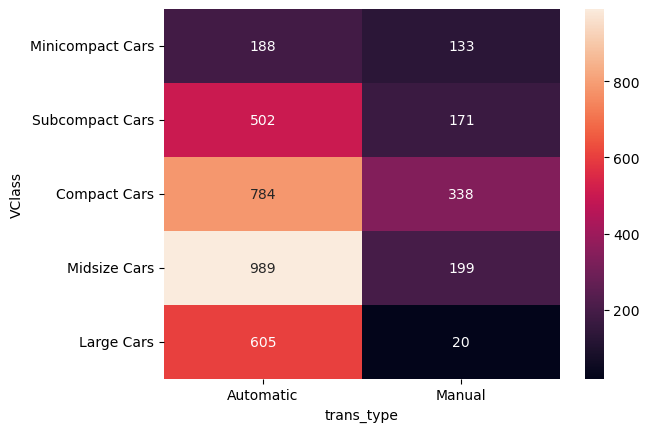

In [32]:
sb.heatmap(ct_counts, annot = True, fmt = 'd');

> An alternative way of showing the distribution in counts
is through the use of a clustered bar chart. Last lesson, you
saw how to use seaborn's `countplot` function to generate a
bar chart of one variable.

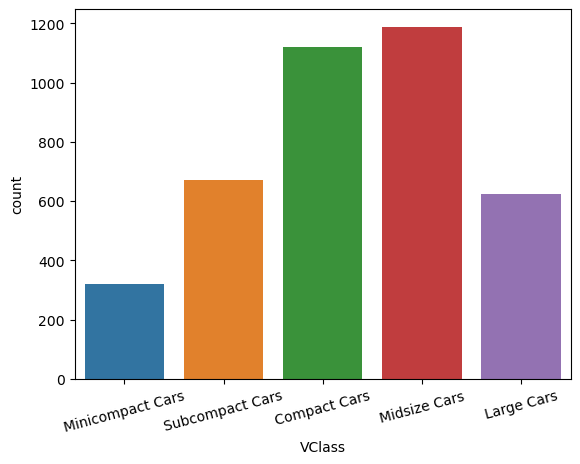

In [33]:
sb.countplot(data = fuel_econ, x = 'VClass');
plt.xticks(rotation = 15);

> To divide each of the individual bars into multiple bars for
the different transmission types, we just need to add a "hue"
parameter pointing to the "trans_type" variable.

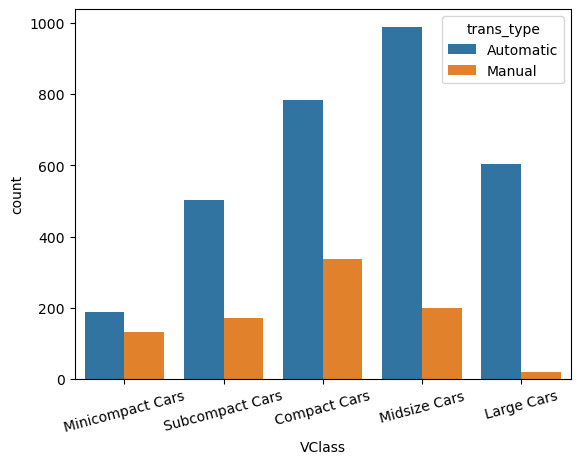

In [34]:
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type');
plt.xticks(rotation = 15);

> Minicompact cars have the closest ratio between automatic and
manual transmission, while large cars have the most distant ratio.

## 4.11 Faceting

### Main Points

1. How to use FacetGrid to set up faceted plots.

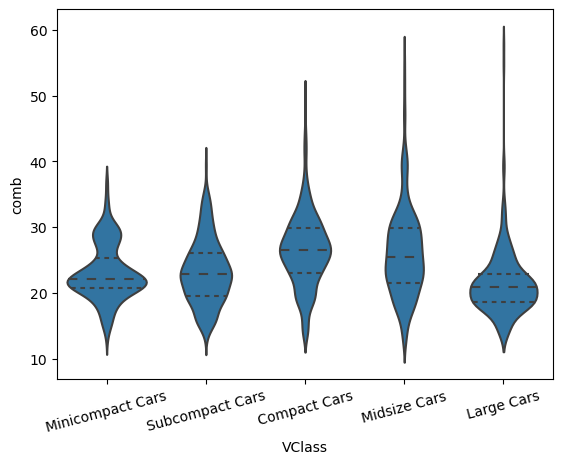

In [35]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color, inner = 'quartile');
plt.xticks(rotation = 15);

> Earlier in this lesson, you saw how violin and box plots
could be used to depict the relationship between one
quantitative and one qualitative variable. Here, we'll use an
alternative strategy: faceting histograms of the quantitative
variable against the qualitative subsets of the data.
>
> To perform faceting, we're going to make use of seaborn's
`FacetGrid` object class. I'm going to set two parameters for
creating the `FacetGrid` object. The `fuel_econ` dataframe is
assigned to "data" like before, and then we assign the "VClass"
column to the "col" parameter. What this means is that for
whatever plot we facet with, there will be one of that plot
made for each level of vehicle class.

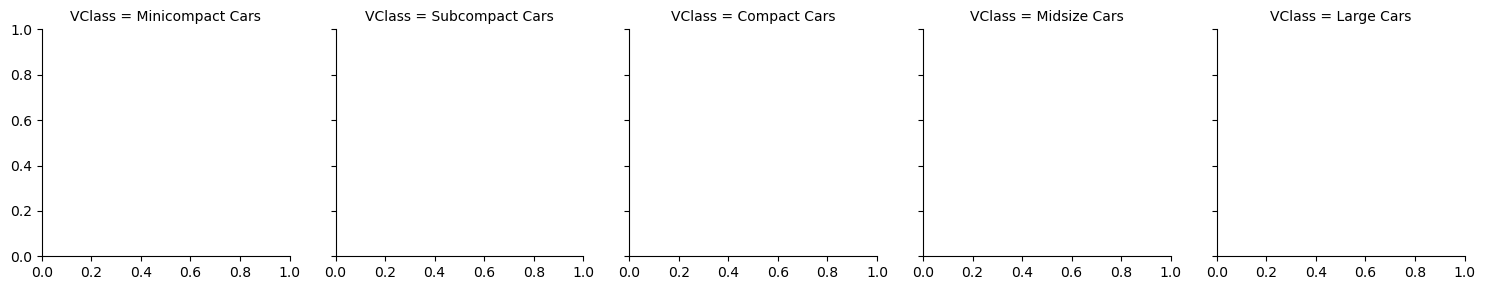

In [36]:
g = sb.FacetGrid(data = fuel_econ, col = 'VClass');

> Now we need to say what kind of plot we want to generate for
each of the facets, using the `map` function of FacetGrid objects.
The first argument is the plotting function, in this case `hist`,
and the immediately following argument the variable to be plotted
on the x-axis, in this case "comb". It's important that you _don't_
set "x =" in this, or the faceting by subgroups won't work correctly.

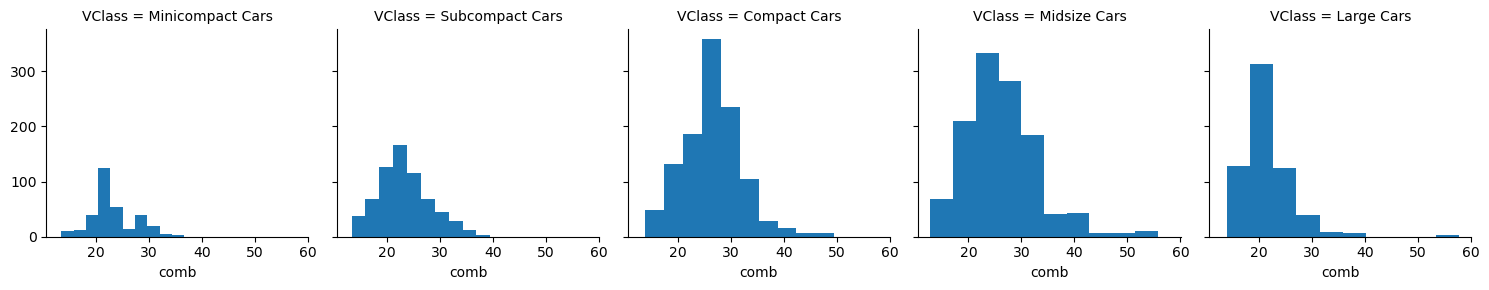

In [37]:
g = sb.FacetGrid(data = fuel_econ, col = 'VClass');
g.map(plt.hist, 'comb');

> You can see that all of the data is plotted using the default
ten bins for `hist`, but the axis limits are the same for each facet.
This is useful for comparing the frequency of each group on the faceted
variable, and the values within each group for the plotted variable.
>
> Let's do a little bit of tweaking to the plots. I'll first add a bins
parameter to the map function, so that the bins across each facet are
the same. Next, I'll add the "col_wrap" parameter to limit the number of
facets that can be placed side by side. This isn't vital for this
particular dataset, but can be useful if you have a lot more levels in
your faceted variable.

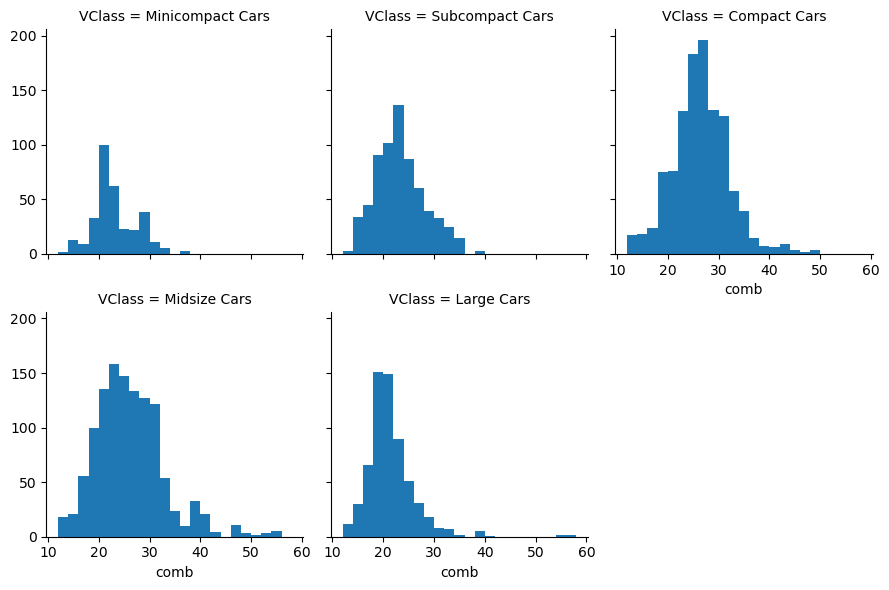

In [38]:
bins = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap = 3);
g.map(plt.hist, 'comb', bins = bins);

> Lastly, I want to demonstrate what happens when you don't fix
the same axis limits across facets. By setting `sharey = False`,
each facet can have its own y-axis limits. It's a little easier this
way to see the change in distributions across levels, but you also
lose out on seeing the overall frequency of each group.

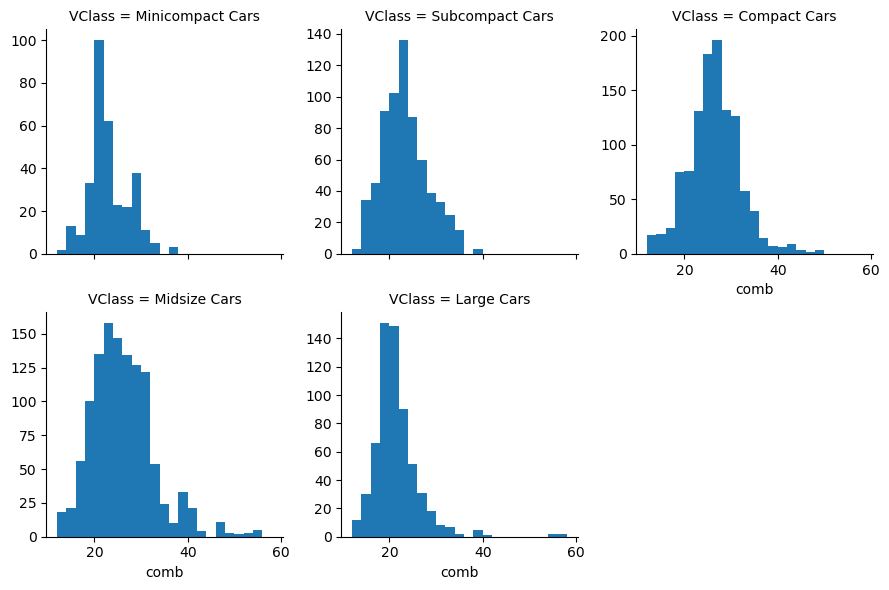

In [39]:
bins = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap = 3, sharey = False);
g.map(plt.hist, 'comb', bins = bins);

## 4.12 Adaptations of Univariate Plots

### Main Points

1. Create a bar chart with the mean / standard deviation of a second variable instead of count.
2. Create a histogram with mean of a second variable instead of count.

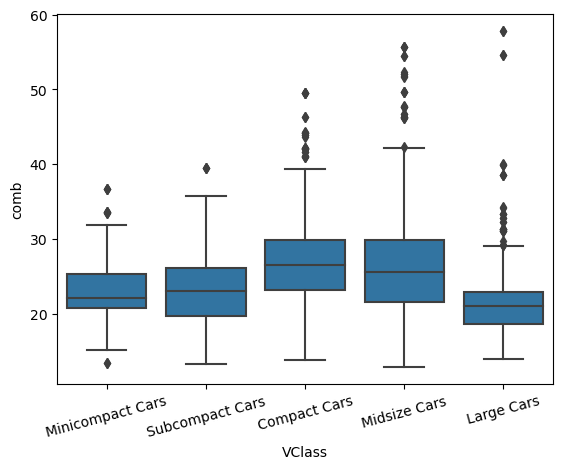

In [40]:
base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb',
           color = base_color);
plt.xticks(rotation = 15);

> One additional option we can have for plotting one
quantitative variable against one qualitative variable
is through the adaptation of a bar chart to show not counts
on the vertical axis, but the mean of a second variable.
>
> To do this, we need to make use of a different function than
the `countplot` function we had before. Instead, seaborn's
`barplot` function will be what we want. I'll add a label to the
y-axis so that it's clear that we're plotting the means on the
y-axis.

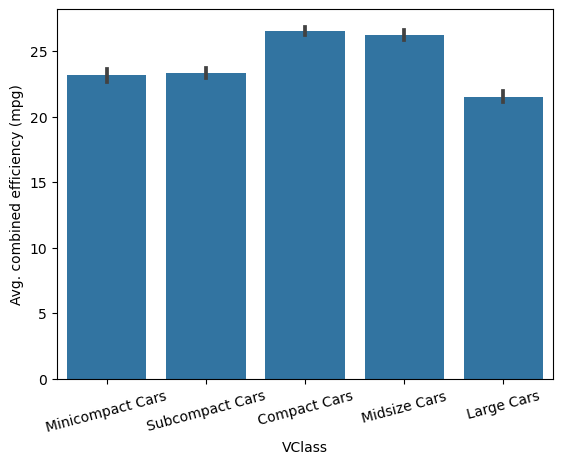

In [41]:
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color);
plt.xticks(rotation = 15);
plt.ylabel('Avg. combined efficiency (mpg)');

> Since we have a bar plot, the bottom limit of the y-axis has
been set at 0. The black lines on each bar indicate uncertainty
about the mean as a confidence interval. Since we have a lot of
data available, the uncertainty whiskers are quite small. If we
want to leave these whiskers out of the plot, we can do so by
setting `errwidth = 0`.

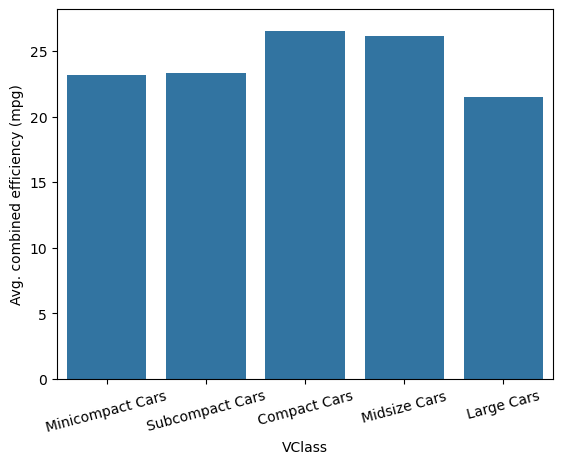

In [42]:
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color, errwidth = 0);
plt.xticks(rotation = 15);
plt.ylabel('Avg. combined efficiency (mpg)');

> Alternatively, we could change the bars to represent the standard
deviation of data points by setting `ci = 'sd'`.

C:\Users\shrig\AppData\Local\Temp\ipykernel_1328\2326289205.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb',


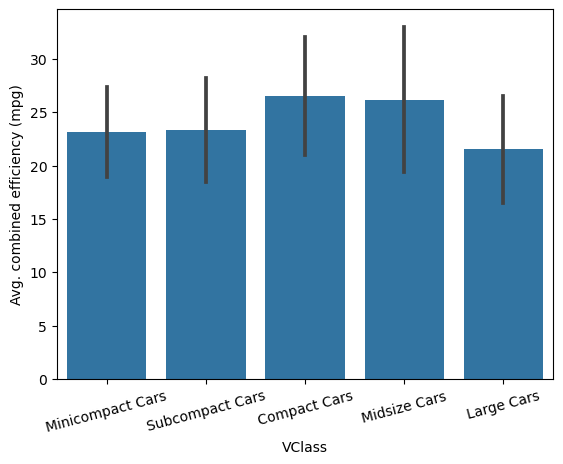

In [43]:
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color, ci = 'sd');
plt.xticks(rotation = 15);
plt.ylabel('Avg. combined efficiency (mpg)');

> If having the 0 lower bound isn't of interest, then you can
choose the `pointplot` function instead of the `barplot` function.
We don't need the color setting in this plot type for everything to
show up as the same color. Note that by default the points are
connected by a line. This isn't a problem in this case since vehicle
class is ordered from smallest to largest. But if we were plotting a
nominal variable instead, we could turn off the line by setting
"linestyles" to an empty string.

C:\Users\shrig\AppData\Local\Temp\ipykernel_1328\1564015700.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', ci = 'sd', linestyles = "");


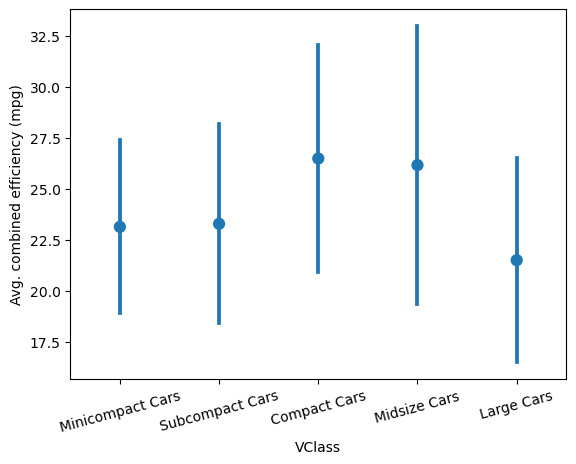

In [44]:
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', ci = 'sd', linestyles = "");
plt.xticks(rotation = 15);
plt.ylabel('Avg. combined efficiency (mpg)');

## 4.13 Line Plots

### Main Points

1. Aggregating numeric data to prepare for line plot generation.
2. Creating a line plot with error bars.

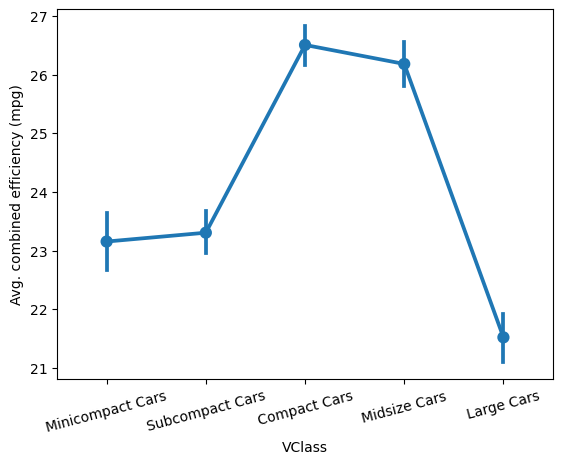

In [45]:
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb');
plt.xticks(rotation = 15);
plt.ylabel('Avg. combined efficiency (mpg)');

> The `pointplot` function you saw previously was good for summarizing
a quantitative variable against a qualitative variable. We need a
different function for summarizing a quantitative variable against a
second quantitative variable, such as with fuel efficiency by engine
displacement.
> 
> In this case, we'll make use of matplotlib's `errorbar` function, which
plots a line between points with an optional setting for adding error bars.
We can set the data, x, and y arguments just like we've done before.

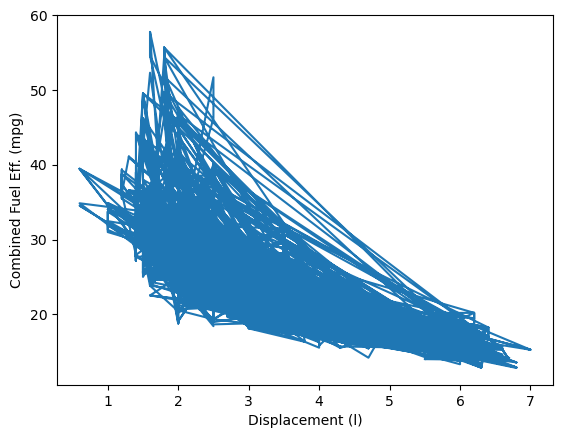

In [46]:
plt.errorbar(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

> Unfortunately, the plot we get out is uninformative. All that matplotlib
is doing is connecting each pair of x- and y- values in order as they appear
in the dataframe, without any sorting. A scatterplot is basically this plot,
but without any connecting lines and distinct points at each value pair.
>
> We will be fine if all of our data is sorted by the x-variable and we only
have one y-value for each x-value. So let's do some work to get a DataFrame
with those qualities. First of all, I'm going to set bin edges and centers
for summarizing the data on the displacement value. I need the centers so
that the points are plotted in their accurate positions; I leave out the last
value of the bin edges since that won't correspond to an actual bin center.

In [47]:
bins_e = np.arange(0.6, 7+0.2, 0.2)
bins_c = bins_e[:-1] + 0.1

> Next, I use pandas' `cut` function to figure out which bin
each data point should be used in. And then I use `groupby` to
group by those displacement bins, and take the mean of points
that fall each each of them.

In [48]:
bins_e = np.arange(0.6, 7+0.2, 0.2)
bins_c = bins_e[:-1] + 0.1

displ_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest = True)
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()

> Finally, we're ready to plot again. Since we're no longer using the
original dataframe, we need to change our arguments, the bin centers
for the x-positions, and the pandas Series with the fuel efficiency
means for the y-positions.

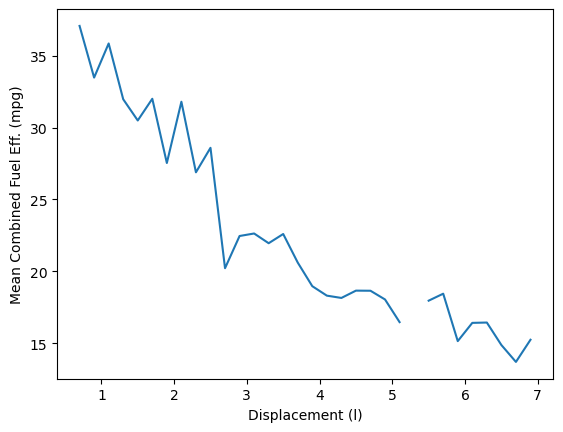

In [49]:
plt.errorbar(x = bins_c, y = comb_mean);
plt.xlabel('Displacement (l)')
plt.ylabel('Mean Combined Fuel Eff. (mpg)');

> The line plot looks like this, showing a general decrease
in fuel efficiency with engine size. There's a gap in the line
where there was no data available. With the `errorbar` function,
we can also compute the standard deviation of the fuel efficiencies
in each bin and plot them through the "yerr" parameter.

In [50]:
bins_e = np.arange(0.6, 7+0.2, 0.2)
bins_c = bins_e[:-1] + 0.1

displ_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest = True)
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

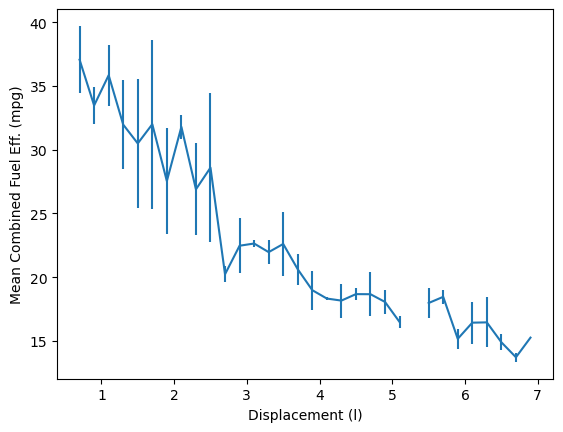

In [51]:
plt.errorbar(x = bins_c, y = comb_mean, yerr = comb_std);
plt.xlabel('Displacement (l)')
plt.ylabel('Mean Combined Fuel Eff. (mpg)');

> This plot shows that while the cars with smaller engine sizes
do have generally higher fuel efficiencies, there's also a lot
more variability in those efficiencies.